["'let" "'much" '-minut' 'abdel' 'accept' 'access' 'accord' 'account'
 'accuraci' 'accus' 'action' 'activ' 'address' 'administr' 'adult' 'advis'
 'advocaci' 'affair' 'afternoon' 'agenc' 'agenda' 'agent' 'aggress' 'agre'
 'agreement' 'al-sisi' 'alabama' 'alexand' 'alleg' 'alli' 'alloc' 'allow'
 'almost' 'along' 'alreadi' 'also' 'amazon' 'america' 'american' 'among'
 'amount' 'amzno' 'analyst' 'analyz' 'anger' 'announc' 'annual' 'anonym'
 'anoth' 'apart' 'appeal' 'appear' 'applic' 'approach' 'approv' 'approxim'
 'april' 'arriv' 'asid' 'aspir' 'assist' 'associ' 'attempt' 'attent'
 'attorney' 'attribut' 'australian' 'author' 'avail' 'avoid' 'awar' 'away'
 'babb' 'back' 'balanc' 'balloon' 'baltimor' 'barack' 'base' 'battl'
 'beach' 'becom' 'beef' 'began' 'begin' 'behind' 'beij' 'believ' 'benefit'
 'besid' 'bezo' 'bias' 'biggest' 'bill' 'billion' 'bitly/jbhlu'
 'bitly/jpexyr' 'bitly/lnpkaq' 'block' 'bloomberg' 'boost' 'border'
 'borrow' 'bother' 'brace' 'break' 'british' 'broader' 'brought' 

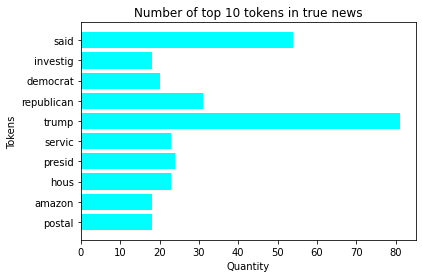

+----+------------+------------+
|    | titles     |   quantity |
|----+------------+------------|
|  0 | postal     |         18 |
|  1 | amazon     |         18 |
|  2 | hous       |         23 |
|  3 | presid     |         24 |
|  4 | servic     |         23 |
|  5 | trump      |         81 |
|  6 | republican |         31 |
|  7 | democrat   |         20 |
|  8 | investig   |         18 |
|  9 | said       |         54 |
+----+------------+------------+


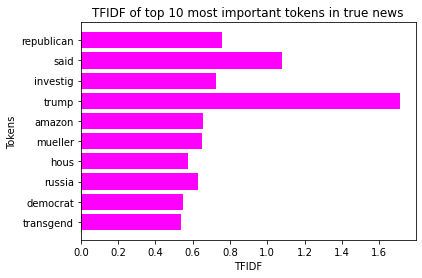

+----+------------+----------+
|    | titles     |    TFIDF |
|----+------------+----------|
|  0 | transgend  | 0.53879  |
|  1 | democrat   | 0.5476   |
|  2 | russia     | 0.626948 |
|  3 | hous       | 0.574806 |
|  4 | mueller    | 0.647784 |
|  5 | amazon     | 0.656217 |
|  6 | trump      | 1.7102   |
|  7 | investig   | 0.725674 |
|  8 | said       | 1.07895  |
|  9 | republican | 0.754718 |
+----+------------+----------+
[ 6  8  7  8  9  8 10  9 10 10]
['elect' 'year' 'would' 'said' 'presid' 'donald' 'reuter' 'trump'
 'politicsnew' 'decemb']


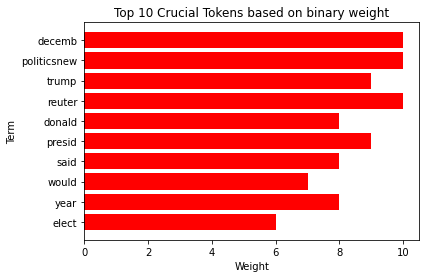

+----+-------------+----------+
|    | term        |   weight |
|----+-------------+----------|
|  0 | elect       |        6 |
|  1 | year        |        8 |
|  2 | would       |        7 |
|  3 | said        |        8 |
|  4 | presid      |        9 |
|  5 | donald      |        8 |
|  6 | reuter      |       10 |
|  7 | trump       |        9 |
|  8 | politicsnew |       10 |
|  9 | decemb      |       10 |
+----+-------------+----------+


In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from services.text_tokenizer import text_tokenizer
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('./data/True.csv', usecols=['title', 'text'])
sample = dataset['title'][:10]

vectorizer = CountVectorizer(tokenizer=text_tokenizer)
vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)

X_transform_sample = vectorizer.fit_transform(sample)
X_transform_sample_tf = vectorizer_tf.fit_transform(sample)
print(vectorizer.get_feature_names_out())
titles = (vectorizer.get_feature_names_out())
array = X_transform_sample.toarray()
array_tf = X_transform_sample_tf.toarray()

"""
Display top 10 tokens
"""

column_sum = np.sum(array, axis=0)
max_val_col = np.argpartition(column_sum, -10)[-10:]
top_10 = column_sum[max_val_col]
print(top_10)
print(titles[np.argpartition(column_sum, -10)[-10:]])

"""
Display top 10 documents
"""

print(array)
row_sum = np.sum(array, axis=1)
max_val_row = np.argpartition(row_sum, -10)[-10:]
top_10_docs = row_sum[max_val_row]
print(top_10_docs)

"""
Display top 10 most important tokens
"""

tf_col_sum = np.sum(array_tf, axis=0)
max_tf_val_col = np.argpartition(tf_col_sum, -10)[-10:]
top_10_tf = tf_col_sum[max_tf_val_col]
print(top_10_tf)
print(titles[np.argpartition(tf_col_sum, -10)[-10:]])

''' Bar plot of quantity top 10 tokens in true news '''

top_10_tokens = titles[np.argpartition(column_sum, -10)[-10:]]
top_10_quantity = column_sum[max_val_col]

plt.barh(top_10_tokens, top_10_quantity, color='cyan')
plt.title('Number of top 10 tokens in true news')
plt.xlabel('Quantity')
plt.ylabel('Tokens')
plt.savefig('./images/quantity.png')
plt.show()

''' Pretty table '''

df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})

top_10_tf_tokens = titles[np.argpartition(tf_col_sum, -10)[-10:]]
top_10_tf_quantity = tf_col_sum[max_tf_val_col]
print(tabulate(df_1, headers='keys', tablefmt='psql'))

''' Bar plot of TF-IDF indexes top 10 most important tokens in true news'''

plt.barh(top_10_tf_tokens, top_10_tf_quantity, color='magenta')
plt.title('TFIDF of top 10 most important tokens in true news')
plt.xlabel('TFIDF')
plt.ylabel('Tokens')
plt.savefig('./images/tf-idf.png')
plt.show()

''' Pretty table '''

df_2 = pd.DataFrame({'titles': top_10_tf_tokens, 'TFIDF': top_10_tf_quantity})
print(tabulate(df_2, headers='keys', tablefmt='psql'))

'''Binary weight'''

vectorizer_bw = CountVectorizer(tokenizer=text_tokenizer, binary=True)
X_transform_bw_sample = vectorizer_bw.fit_transform(sample)
titles_bw = (vectorizer_bw.get_feature_names_out())
array_bw = X_transform_bw_sample.toarray()

column_sum_bw = np.sum(array_bw, axis=0)
max_val_col_bw = np.argpartition(column_sum_bw, -10)[-10:]
top_10_bw = column_sum_bw[max_val_col_bw]
print(top_10_bw)
print(titles_bw[np.argpartition(column_sum_bw, -10)[-10:]])

top_10_bw_terms = titles_bw[np.argpartition(column_sum_bw, -10)[-10:]]

plt.barh(top_10_bw_terms, top_10_bw, color='red')
plt.title('Top 10 Crucial Tokens based on binary weight')
plt.xlabel('Weight')
plt.ylabel('Term')
plt.savefig('./images/tf-binary-weight.png')
plt.show()

''' Pretty table '''

df_3 = pd.DataFrame({'term': top_10_bw_terms, 'weight': top_10_bw})
print(tabulate(df_3, headers='keys', tablefmt='psql'))